In [7]:
# Plot the 3C template waveforms recorded at all stations

In [8]:
## Import modules
from matplotlib import pyplot as plt
from matplotlib import ticker
from obspy import read, UTCDateTime
from cc_utils import read_template_and_match, read_and_process_match_waveforms
from os.path import join

In [9]:
## Inputs
root = "/Volumes/OmanData/geophones_no_prefilt/data"
timewin = "2020-01-12-17-00-00"
tempname = "Twin1"
matchname = "Match1015"
phase = "X"

freqmin = 10.0
freqmax = None
dur = 0.04
mincc = 0.7
numdet_min = 4

freqmin = 10
freqmax = None

begin = -0.05
end = 0.15

ymax = 5000.0

In [10]:
## Read the template and match file
if freqmax is None:
    suffix = f"Highpass{freqmin:.0f}Hz_Dur{dur:.2f}s_MinCC{mincc:.1f}_MinDet{numdet_min:d}"
else:
    suffix = f"Bandpass{freqmin:.0f}-{freqmax:.0f}Hz_Dur{dur:.2f}s_MinCC{mincc:.1f}_MinDet{numdet_min:d}"
filename = f"CCmatches_{tempname}_{suffix}.dat"

inpath = join(root, timewin, filename)
tempmatch = read_template_and_match(inpath)
matches = tempmatch.matches


In [11]:
## Find the match to plot
match = matches.get_match_by_name(matchname)

In [12]:
## Read and process the match waveforms
matchwaveforms = read_and_process_match_waveforms(match, root, freqmin, freqmax, begin=begin, end=end, reference="common")
stream = matchwaveforms.waveforms

['A04', 'A03', 'A02', 'A06', 'A05', 'A01']
18


Text(0.5, 0, 'Time (s)')

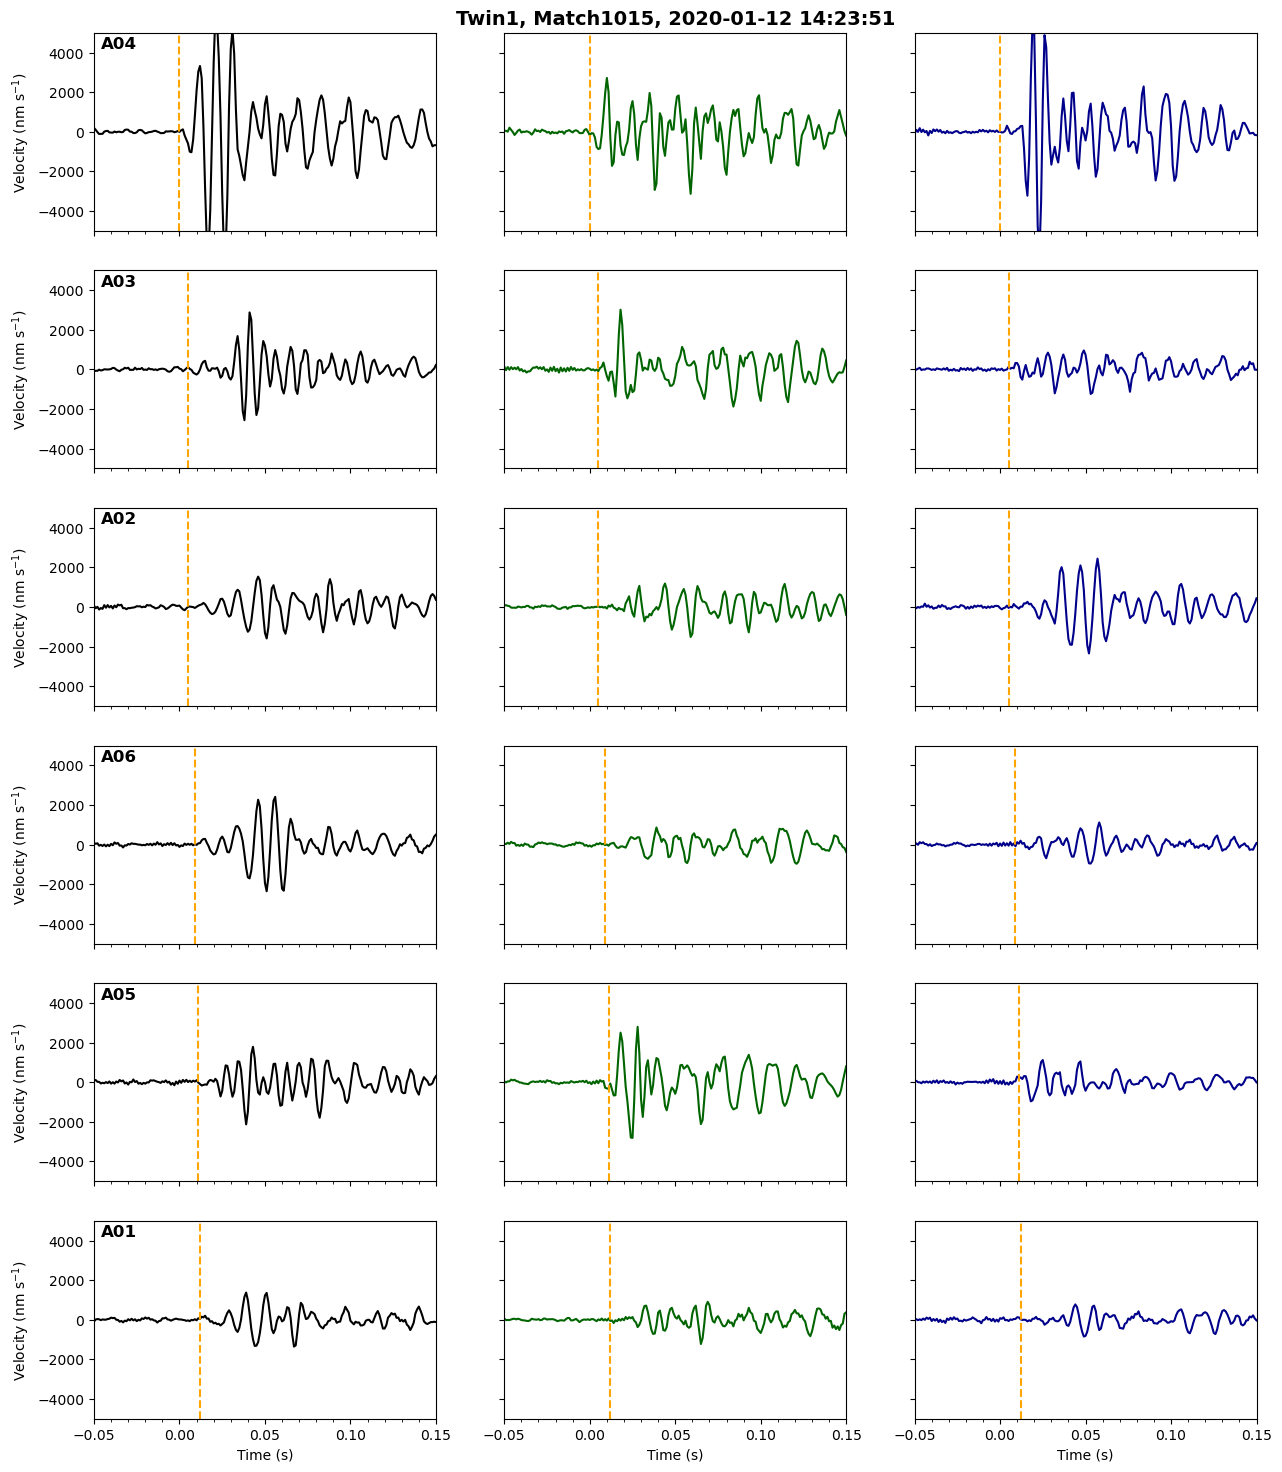

In [13]:
## Plot the waveforms for each station
stations = match.stations
numst = len(stations)

fig, axes = plt.subplots(nrows=numst, ncols=3, sharex=True, sharey=True, figsize=(15, numst*3))
starttime0 = UTCDateTime(match.first_start_time)

for i, station in enumerate(stations):
    trace_z = stream.select(station=station, channel="*Z")[0]
    trace_1 = stream.select(station=station, channel="*1")[0]
    trace_2 = stream.select(station=station, channel="*2")[0]

    data_z = trace_z.data
    data_1 = trace_1.data
    data_2 = trace_2.data

    timeax = trace_z.times()+begin

    axes[i, 0].plot(timeax, data_z, "black")
    axes[i, 1].plot(timeax, data_1, "darkgreen")
    axes[i, 2].plot(timeax, data_2, "darkblue")

    ### Annotate the axes
    axes[i, 0].text(0.02, 0.98, f"{station}", transform=axes[i, 0].transAxes, horizontalalignment="left", verticalalignment="top", fontsize=12, fontweight="bold")

    ### Plot the P wave pick
    starttime = UTCDateTime(match.start_times[i])
    axes[i, 0].axvline(starttime-starttime0, color="orange", linestyle="--")
    axes[i, 1].axvline(starttime-starttime0, color="orange", linestyle="--")
    axes[i, 2].axvline(starttime-starttime0, color="orange", linestyle="--")
    
    ### Set the axes attributes
    axes[i, 0].set_xlim(begin, end)
    axes[i, 0].set_ylim(-ymax, ymax)

    axes[i, 1].set_xlim(begin, end)
    axes[i, 1].set_ylim(-ymax, ymax)

    axes[i, 2].set_xlim(begin, end)
    axes[i, 2].set_ylim(-ymax, ymax)

    axes[i, 0].xaxis.set_major_locator(ticker.MultipleLocator(0.05))
    axes[i, 1].xaxis.set_major_locator(ticker.MultipleLocator(0.05))
    axes[i, 2].xaxis.set_major_locator(ticker.MultipleLocator(0.05))

    axes[i, 0].xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
    axes[i, 1].xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
    axes[i, 2].xaxis.set_minor_locator(ticker.MultipleLocator(0.01))

    axes[i, 0].set_ylabel("Velocity (nm s$^{-1}$)")

    if i == 0:
        timestr = starttime0.strftime("%Y-%m-%d %H:%M:%S")
        axes[i, 1].set_title(f"{tempname}, {matchname}, {timestr}", fontsize=14, fontweight="bold")


axes[numst-1, 0].set_xlabel("Time (s)")
axes[numst-1, 1].set_xlabel("Time (s)")
axes[numst-1, 2].set_xlabel("Time (s)")

In [14]:
## Save the figure
fig.tight_layout()

filename = f"MatchewdWaveforms_{tempname}_{matchname}_{suffix}.png"
outpath = join(root, timewin, filename)
fig.savefig(outpath, dpi=300, transparent=True)

In [15]:
print(match.stations)

['A04', 'A03', 'A02', 'A06', 'A05', 'A01']
